In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [47]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [49]:
# nom of missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [52]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [53]:
df= df.drop(['Time'], axis = 1)


In [54]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


In [55]:
df.duplicated().any()

True

In [56]:
df = df.drop_duplicates()

In [57]:
df.shape

(275663, 30)

In [58]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<Axes: ylabel='count'>

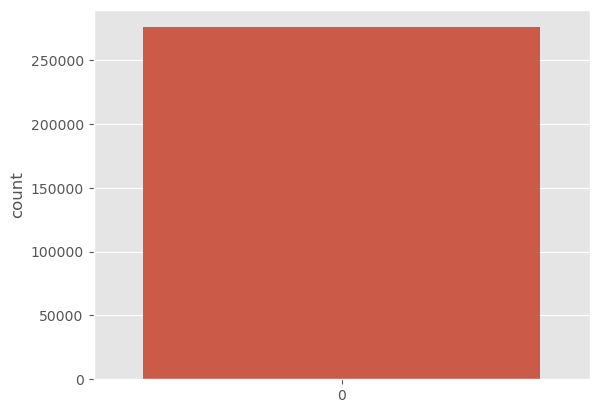

In [59]:
sns.countplot(df['Class'])

In [60]:
X = df.drop('Class', axis = 1)
y=df['Class']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2, random_state = 42)

In [63]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [64]:
classifier ={
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}
for name, clf in classifier.items():
    print(f'\n====={name}=====')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'\n Precision: {precision_score(y_test, y_pred)}')
    print(f'\n Recall: {recall_score(y_test, y_pred)}')
    print(f'\n F1 Score: {f1_score(y_test, y_pred)}')


=====Logistic Regression=====

 Accuracy: 0.9992200678359603

 Precision: 0.8870967741935484

 Recall: 0.6043956043956044

 F1 Score: 0.718954248366013

=====Decision Tree Classifier=====

 Accuracy: 0.998911722561805

 Precision: 0.6504854368932039

 Recall: 0.7362637362637363

 F1 Score: 0.6907216494845361


In [65]:
#handing imbalanced data  by undersampling and over sampling

In [66]:
# under sampling 


In [67]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [68]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [69]:
normal.shape

(275190, 30)

In [70]:
fraud.shape

(473, 30)

In [71]:
norm_sam =normal.sample(n=473)

In [72]:
norm_sam.shape

(473, 30)

In [73]:
n_data =pd.concat([norm_sam,fraud], ignore_index = True)

In [74]:
n_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2.022934,-0.075135,-1.248791,0.231446,0.260812,-0.451975,0.115969,-0.148650,0.186265,0.194753,...,-0.190780,-0.416539,0.299949,0.799744,-0.183568,0.217427,-0.077150,-0.063913,-0.332399,0
1,1.099404,-0.162275,1.371746,0.953737,-1.171798,-0.449538,-0.494273,-0.024671,0.720787,-0.290800,...,-0.037562,0.072876,0.029963,0.795078,0.240692,0.288800,0.019385,0.038660,-0.193346,0
2,-1.386283,0.511381,1.480592,-0.306595,0.006732,-0.200173,0.243600,0.663594,-0.537180,-1.068195,...,0.032007,-0.148998,-0.033253,0.235198,0.060133,0.105624,-0.087417,-0.038562,-0.177753,0
3,-1.421635,0.488077,3.127100,0.450833,-1.420075,1.158210,-0.746696,0.245251,0.870524,1.365026,...,-0.414373,0.321898,-0.428364,0.061296,0.621833,-0.183208,0.483807,0.166750,-0.273268,0
4,2.197582,-1.482909,-1.806083,-1.681159,-0.759939,-0.836398,-0.594978,-0.275522,-1.507394,1.662671,...,-0.298378,-0.744772,0.243159,0.328377,-0.216438,-0.328259,-0.051145,-0.042360,0.048578,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,1


In [75]:
n_data.shape

(946, 30)

In [76]:
n_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [77]:
X = n_data.drop('Class', axis=1)
y = n_data['Class']

In [78]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2, random_state = 42)

In [79]:
classifier ={
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}
for name, clf in classifier.items():
    print(f'\n====={name}=====')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'\n Precision: {precision_score(y_test, y_pred)}')
    print(f'\n Recall: {recall_score(y_test, y_pred)}')
    print(f'\n F1 Score: {f1_score(y_test, y_pred)}')


=====Logistic Regression=====

 Accuracy: 0.9368421052631579

 Precision: 0.96875

 Recall: 0.9117647058823529

 F1 Score: 0.9393939393939394

=====Decision Tree Classifier=====

 Accuracy: 0.9105263157894737

 Precision: 0.897196261682243

 Recall: 0.9411764705882353

 F1 Score: 0.9186602870813397


In [ ]:
#oversampling

In [82]:
X= df.drop('Class', axis= 1)
y = df['Class']

In [83]:
X.shape

(275663, 29)

In [85]:
y.shape

(275663,)

In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [88]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [89]:
X_train,X_test,y_train,y_test =train_test_split(X_res,y_res,test_size =0.2, random_state = 42)

In [90]:
classifier ={
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}
for name, clf in classifier.items():
    print(f'\n====={name}=====')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'\n Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'\n Precision: {precision_score(y_test, y_pred)}')
    print(f'\n Recall: {recall_score(y_test, y_pred)}')
    print(f'\n F1 Score: {f1_score(y_test, y_pred)}')


=====Logistic Regression=====

 Accuracy: 0.945537628547549

 Precision: 0.9729771463866584

 Recall: 0.9164591022307874

 F1 Score: 0.9438728220876127

=====Decision Tree Classifier=====

 Accuracy: 0.9978741960100295

 Precision: 0.9969332389714556

 Recall: 0.9988182462774757

 F1 Score: 0.9978748524203069


In [92]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res,y_res)

DecisionTreeClassifier()

In [93]:
# saving the model for use and shearing

In [94]:
import joblib

In [97]:
joblib.dump(dtc,'Credit_card_Trained_model.pkl')

['Credit_card_Trained_model.pkl']

In [101]:
model = joblib.load('Credit_card_Trained_model.pkl')

In [98]:
#load model for use 

In [109]:
pred = model.predict([[-0.549615438496227,	2.21907469290599,	-3.52202432215688,	0.236995179253694,	1.0874688565719,	-1.23553009267737,	-0.279312556848985,	0.514360709931382,	-1.84992742118892,	-3.44381902213252,	2.21400028680889,	-1.6898355101423,	0.498437678119739,	-4.39363360177944,	-1.27084139528992,	-1.17662872177405,	-1.8597389700645,	-0.0494185884951729,	0.38526260953691,	0.126517943495233,	0.364130240632527,	0.210428090003568,	-0.366018663493106,	0.0158025669543916,	0.349211539966759,	0.647302275361242,	0.17192919537209,	0.11718822829994,	0.76]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [110]:
pred[0]

1

In [111]:
if pred[0]== 0:
    print('Normal Transaction')
else:
    print('Fraud Transaction')


Fraud Transaction


In [80]:
werhu

NameError: name 'werhu' is not defined

In [ ]:
#distri of legit and fraudulant
df['Class'].value_counts()

In [ ]:
#is highly imbalance 
# 0 normal
# 1 fraud

In [ ]:
# seperating data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

In [ ]:
#stat mearsures for the data
legit.Amount.describe()

In [ ]:
#explanation
# 25% of the transaction amount are less than 5
# 50% 

In [ ]:
fraud.Amount.describe()

In [ ]:
# by observation the mean of fraud transaction is higher than the legit

In [ ]:
#compact d values for both transaction
df.groupby('Class').mean()

In [ ]:
#under sampling(boiuld sample data set or normal transaction and the fraud transaction) d num of fraud transaction is 492
legit_sample = legit.sample(n = 492)

In [ ]:
# concatinate to two dataframes
new_dataset = pd.concat([legit_sample,fraud], axis=0) #axsis 0 is rowwise while 1 column

In [ ]:
new_dataset.head()

In [ ]:
new_dataset.tail()

In [ ]:
new_dataset['Class'].value_counts()# is now uniform now

In [ ]:
new_dataset.groupby('Class').mean()

In [ ]:
#slipting d data into features
X = new_dataset.drop(columns = 'Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

In [ ]:
print(Y)

In [ ]:
#split the data into train data and testing data


In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify = Y ,random_state=2)

In [ ]:
#model training
model = LogisticRegression()

In [ ]:
#training the logistic regression model
model.fit(X_train,Y_train)

In [ ]:
#model evaluation based on accuracy score
# on training data
X_train_prediction = model.predict(X_train)
training_dta_accuracy = accuracy_score(X_train_prediction, Y_train)


In [ ]:
print('Acuracy on training data :',training_dta_accuracy )

In [ ]:
# if the accuracy score is greater than 70% then its goood now this is good


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_dta_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on testa data :', test_dta_accuracy)

In [ ]:
# create a decision tree clasifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

In [ ]:
y_pred2=dt.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
accuracy_score(X_test_prediction,Y_test)

In [ ]:
precision_score(X_test_prediction,Y_test)

f1_score(X_test_prediction,Y_test)

In [ ]:
f1_score(X_test_prediction,Y_test)